In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
x = np.genfromtxt('/Users/maria/OneDrive/Documentos/mle/satgpa.csv',delimiter=',',skip_header=1)
y = np.array([x[:,5]]).T
X = x[:,[0,3,4]]
m,n = X.shape
unos = np.ones((m,1))
X = np.concatenate((unos,X), axis = 1)
X

array([[  1.  ,   1.  , 127.  ,   3.4 ],
       [  1.  ,   2.  , 122.  ,   4.  ],
       [  1.  ,   2.  , 116.  ,   3.75],
       ...,
       [  1.  ,   1.  , 114.  ,   3.5 ],
       [  1.  ,   1.  , 120.  ,   2.3 ],
       [  1.  ,   1.  ,  93.  ,   2.7 ]])

[1, 4, 0, 4.5]

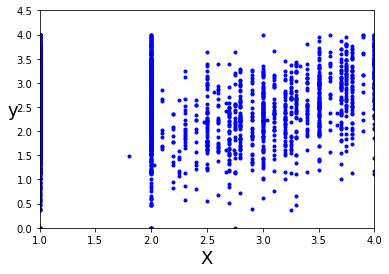

In [56]:
plt.plot(X,y,'b.')
plt.xlabel('X', fontsize=18)
plt.ylabel('y', rotation=0, fontsize=18)
plt.axis([1,4,0,4.5])

In [9]:
theta_0 = np.random.rand(n+1, 1)

In [10]:
def linear_cost(X, y, theta):
    h = X @ theta
    return ((y - h) ** 2).sum() / (2 * len(x))

In [11]:
def linear_cost_gradient(X, y, theta):
    h = X @ theta
    return ((h - y).T @ X).T / len(x)

In [45]:
def gradient_descent(
    X,
    y,
    theta_0,
    cost_function,
    cost_function_gradient,
    learning_rate = 0.0001,
    threshold = 0.01,
    max_iter = 1000
):
    theta = theta_0
    iteration = 0
    costs = []
    
    while np.linalg.norm(cost_function_gradient(X, y, theta)) > threshold and iteration < max_iter:
        iteration += 1
        theta = theta - (learning_rate * cost_function_gradient(X, y, theta))
        costs.append(cost_function(X, y, theta))
        
    return theta, costs


In [46]:
t, c = gradient_descent(X,y,theta_0,linear_cost,linear_cost_gradient)

In [63]:
print('RESULTADOS \nTheta 0:          {:0.3f},\nTheta 1:          {:0.3f}, \nTheta 2:         {:0.3f},\nTheta 3:          {:0.3f}'.format(t[0][0],t[1][0],t[2][0],t[3][0]))
print('X1 = sex,   X2 = sat_sum,   X3 = hs_gpa')
print('Ecuacion lineal de notas: {:0.3f} + {:0.3f} X1 + {:0.3f} X2 + {:0.3f} X3'.format(t[0][0],t[1][0],t[2][0],t[3][0]))
print('SGD minimo:  {:0.3f}'.format(c[-1]))


RESULTADOS 
Theta 0:          0.747,
Theta 1:          0.419, 
Theta 2:         -0.016,
Theta 3:          0.876
X1 = sex,   X2 = sat_sum,   X3 = hs_gpa
Ecuacion lineal de notas: 0.747 + 0.419 X1 + -0.016 X2 + 0.876 X3
SGD minimo:  0.283


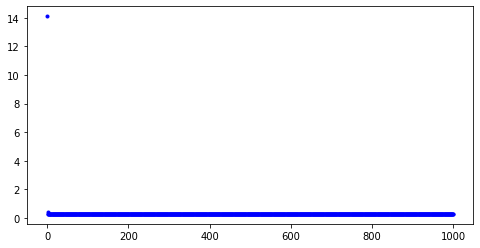

In [61]:
fig,ax = plt.subplots(figsize=(8,4))
_=ax.plot(range(1000),c,'b.')